<a href="https://colab.research.google.com/github/adamazanos/rakamin_data_loan/blob/main/Homework_RTC_adamazano_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Rakamin Digital Fest 2023 yang diselenggarakan pada bulan Februari

Projek ini bertujuan untuk akan menganalisa dan mendapatkan insight seputar data nasabah yang mengajukan pinjaman untuk properti 

Author: Adam Azano Satrio 
Template: Rakamin

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# change file path if necessary
df = pd.read_csv('https://raw.githubusercontent.com/adamazanos/rakamin_data_loan/main/Rakamin_loan_customer_feb.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [4]:
df.shape

(621, 17)

In [5]:
df.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


Untuk kemudahan bagi data kita bagi df berdasarkan kategori

In [6]:
data_numerik = df[['applicant_income', 'coapplicant_income', 'loan_amount']]
data_numerik

,applicant_income,coapplicant_income,loan_amount
0,5849.0,0.0,100000
1,4583.0,1508.0,128000
2,3000.0,0.0,66000
3,2583.0,2358.0,120000
4,6000.0,0.0,141000
...,...,...,...
616,2900.0,0.0,71000
617,4106.0,0.0,40000
618,8072.0,240.0,253000
619,7583.0,0.0,187000


In [7]:
data_kategorik = df[['gender', 'married','dependents', 'education', 'self_employed', 'credit_history', 'property_type', 'loan_status']]
data_kategorik

,gender,married,dependents,education,self_employed,credit_history,property_type,loan_status
0,Male,No,0,Graduate,No,1.0,house,APPROVE
1,Male,Yes,1,Graduate,No,1.0,studio,REJECT
2,Male,Yes,0,Graduate,Yes,1.0,house,APPROVE
3,Male,Yes,0,Not Graduate,No,1.0,house,APPROVE
4,Male,No,0,Graduate,No,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...
616,Female,No,0,Graduate,No,1.0,studio,APPROVE
617,Male,Yes,3+,Graduate,No,1.0,studio,APPROVE
618,Male,Yes,1,Graduate,No,1.0,house,APPROVE
619,Male,Yes,2,Graduate,No,1.0,house,APPROVE


In [8]:
data_id_key = df[["loan_id", "birth_date" ,	"phone_number"]]
data_id_key

,loan_id,birth_date,phone_number
0,LP001002,1977-05-15,6.281142e+11
1,LP001003,1979-08-24,6.287764e+11
2,LP001005,1991-03-28,6.281192e+11
3,LP001006,1980-06-02,6.285634e+10
4,LP001008,1989-05-19,6.281130e+11
...,...,...,...
616,LP002978,1976-03-25,6.285650e+11
617,LP002979,1987-01-26,6.281165e+11
618,LP002983,1982-03-08,6.281158e+11
619,LP002984,1986-12-05,6.281196e+11


# ***Data Cleansing***

# Handling duplicated data

Pengecekan loan_id key yang terduplikat

In [9]:
data_id_key.duplicated().sum()

5

In [10]:
df_id = data_id_key.duplicated()

In [11]:
df[df_id]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


Verifikasi data

In [12]:
loan_ids = ['LP001310', 'LP001904', 'LP001990', 'LP002160', 'LP002277']
df_filtered = df.loc[df['loan_id'].isin(loan_ids)]
df_filtered

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,NaN,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
278,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,NaN,house,REJECT
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
362,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


Beberapa key dari loan_id terduplikat 1 kali dan ditemukan informasi NaN dari duplikat kolom dari has_credit_card

In [13]:
df.duplicated().sum()

1

In [14]:
df.loc[df['loan_id'] == 'LP001990']

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,NaN,house,REJECT
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT


Imputasi data NaN yang tersedia dari loan_Id key yang ganda

In [15]:
df_filtered = df_filtered.groupby('loan_id').apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_filtered.reset_index(drop=True, inplace=True)

In [16]:
df_filtered

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
1,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
2,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
3,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
4,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
5,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
6,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
7,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
8,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT
9,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT


In [17]:
df_filtered.duplicated().sum()
df_filtered.drop_duplicates()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
2,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
4,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
6,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
8,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT


In [18]:
df_duplikat = df_filtered.drop_duplicates()

In [19]:
df_duplikat

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
2,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
4,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
6,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
8,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT


In [20]:
df.loc[df['loan_id'] == 'LP001310']

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,NaN,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE


Drop data duplikat

In [21]:
df = pd.concat([df, df_duplikat]).reset_index(drop=True)
df = df.drop_duplicates(subset=['loan_id'], keep='last')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
622,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
623,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
624,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE


In [22]:
df.duplicated().sum()

0

Verifikasi Duplikat

In [23]:
loan_ids = ['LP001310', 'LP001904', 'LP001990', 'LP002160', 'LP002277']
df.loc[df['loan_id'].isin(loan_ids)]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
621,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
622,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
623,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
624,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
625,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT


# ***Handling missing values***

# Pengecekan data Null/NaN

Pengecekan data yang hilang

In [24]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       528
property_type           1
loan_status             0
dtype: int64

Kolom Data yang bisa di buang

*   phone_number karena tidak relevan
*   birth_date karena tidak diketahui kapan data ini dipakai dan tidak bisa menunjukan umur
*   has_credit_card karena jumlah Nan sudah melebihi 75 %

Kolom data yang bisa di imput dengan modus

*   gender menggunakan Modus
*   married Menggunakan Modus
*   property_type Menggunakan modus
*   dependents Menggunakan modus
*   self_employed menggunakan modus
*   credit_history menggunakan modus

Kolom data yang bisa di imput dengan mean

*   applicant_income menggunakan mean

#Data kolom yang dibuang

In [25]:
df = df.drop(['phone_number','birth_date','has_credit_card'], axis=1)
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,LP001310,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,apartment,APPROVE
622,LP001904,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,house,APPROVE
623,LP001990,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,house,REJECT
624,LP002160,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,apartment,APPROVE


#Kolom data di imput dengan Modus

#Pencarian Modus 

In [26]:
for col in ['married', 'gender', 'education' , 'property_type','dependents','self_employed','credit_history',]:
    counts = df[col].value_counts()
    print(counts)


Yes    400
No     213
Name: married, dtype: int64
Male      491
Female    112
Name: gender, dtype: int64
Graduate        481
Not Graduate    134
Name: education, dtype: int64
apartment    233
house        203
studio       179
Name: property_type, dtype: int64
0     345
1     103
2     101
3+     51
Name: dependents, dtype: int64
No     501
Yes     82
Name: self_employed, dtype: int64
1.0    476
0.0     89
Name: credit_history, dtype: int64


Isi data Dengan modus yang diketahui

In [27]:
columns_to_fill = ['married', 'gender', 'education' , 'property_type','dependents','self_employed','credit_history',]
fill_values = ['Yes', 'Male', 'Graduate', 'apartment', '0' , 'No', 'No']
for col, fill_value in zip(columns_to_fill, fill_values):
    df[col].fillna(fill_value, inplace=True)


Verifikasi imputasi modus

In [28]:
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      9
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

#Kolom data di imput dengan Mean

# Pencarian Mean

In [29]:
df['applicant_income'].mean()

5696.808896210873

In [30]:
df['applicant_income'].fillna(df['applicant_income'].mean(), inplace=True)

Verifikasi imput Mean

In [31]:
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

# Handling Outlier

# Visualisasi Outlier

Untuk kemudahan pengecekan outlier akan divisualisaikan terutama untuk data bersifat numeric seperti




*   applicant_income
*   coapplicant_income
*   loan_amount


In [32]:
col_numer = ['applicant_income', 'coapplicant_income', 'loan_amount']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

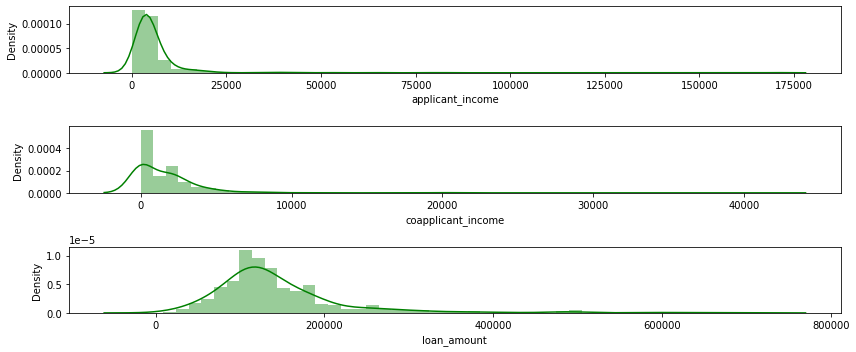

In [33]:
plt.figure(figsize=(12, 5))
for i in range(0, len(col_numer)):
    plt.subplot(3, len(col_numer)//2, i+1)
    sns.distplot(df[col_numer[i]], color='green')
    plt.tight_layout()

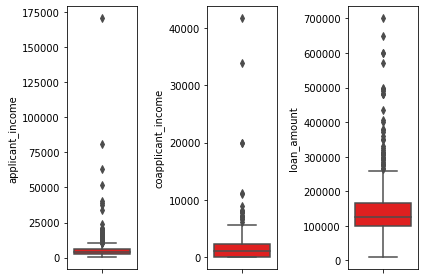

In [34]:
for i in range(0, len(col_numer)):
    plt.subplot(1, len(col_numer), i+1)
    sns.boxplot(y=df[col_numer[i]], color='red', orient='v')
    plt.tight_layout()

# **Feature Encoding**

# Analisa kolom

Kolom yang akan digunakan untuk feature encoding berdasarkan target tugas adalah 

**Minat pelanggan berdasarkan tipe properti**

*   'property_type'
*   'gender'

**Pengaruh status perkawinan terhadap jangka waktu meminjam**
*   'married'
*   'loan_term_year'




Property dan Gender

In [35]:
grouped_1 = df.groupby(['property_type','gender']).count().reset_index()
grouped_1

,property_type,gender,loan_id,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,loan_status
0,apartment,Female,55,55,55,55,55,55,55,55,55,55,55,55
1,apartment,Male,179,179,179,179,179,179,179,179,179,179,179,179
2,house,Female,33,33,33,33,33,33,33,33,33,33,33,33
3,house,Male,170,170,170,170,170,170,170,170,170,170,170,170
4,studio,Female,24,24,24,24,24,24,24,24,24,24,24,24
5,studio,Male,155,155,155,155,155,155,155,155,155,155,155,155


Loan Term Year dan Married

In [36]:
grouped_2 = df.groupby(['loan_term_year','married']).count().reset_index()
grouped_2

,loan_term_year,married,loan_id,gender,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,credit_history,property_type,loan_status
0,1,Yes,1,1,1,1,1,1,1,1,1,1,1,1
1,3,No,2,2,2,2,2,2,2,2,2,2,2,2
2,5,No,1,1,1,1,1,1,1,1,1,1,1,1
3,5,Yes,1,1,1,1,1,1,1,1,1,1,1,1
4,7,Yes,4,4,4,4,4,4,4,4,4,4,4,4
5,10,No,1,1,1,1,1,1,1,1,1,1,1,1
6,10,Yes,2,2,2,2,2,2,2,2,2,2,2,2
7,15,No,8,8,8,8,8,8,8,8,8,8,8,8
8,15,Yes,36,36,36,36,36,36,36,36,36,36,36,36
9,20,No,1,1,1,1,1,1,1,1,1,1,1,1


# **Business Insight**

## Analisis minat pelanggan berdasarkan pada tipe properti

tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti.

In [37]:
table_1 = pd.pivot_table(grouped_1, values='loan_id', index=['gender'], columns=['property_type'], aggfunc=sum)
table_1

property_type,apartment,house,studio
gender,,,
Female,55,33,24
Male,179,170,155


# Visualisasi Gender dan jenis properti

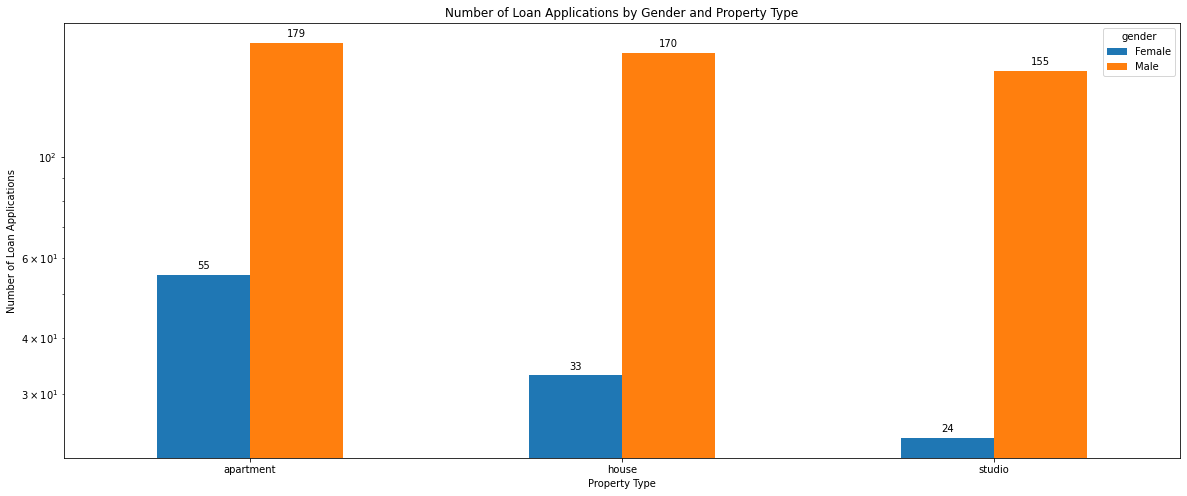

In [38]:
loan_count = df.groupby(['gender', 'property_type'])['loan_id'].count()

# Convert the result into a pivot table
loan_count = loan_count.reset_index().pivot(index='property_type', columns='gender', values='loan_id')

# Create a bar chart
ax = loan_count.plot(kind='bar', figsize=(20, 8))
plt.title('Number of Loan Applications by Gender and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Loan Applications')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=4)

plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

# Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan
berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun).

In [39]:
table_2 = pd.pivot_table(df, values='loan_id', index=['loan_term_year'], columns=['married'], aggfunc='count', fill_value=0)
table_2

married,No,Yes
loan_term_year,,
1,0,1
3,2,0
5,1,1
7,0,4
10,1,2
15,8,36
20,1,3
25,3,10
30,188,340


# Visualisasi status perkawinan terhadap jangka waktu meminjam 

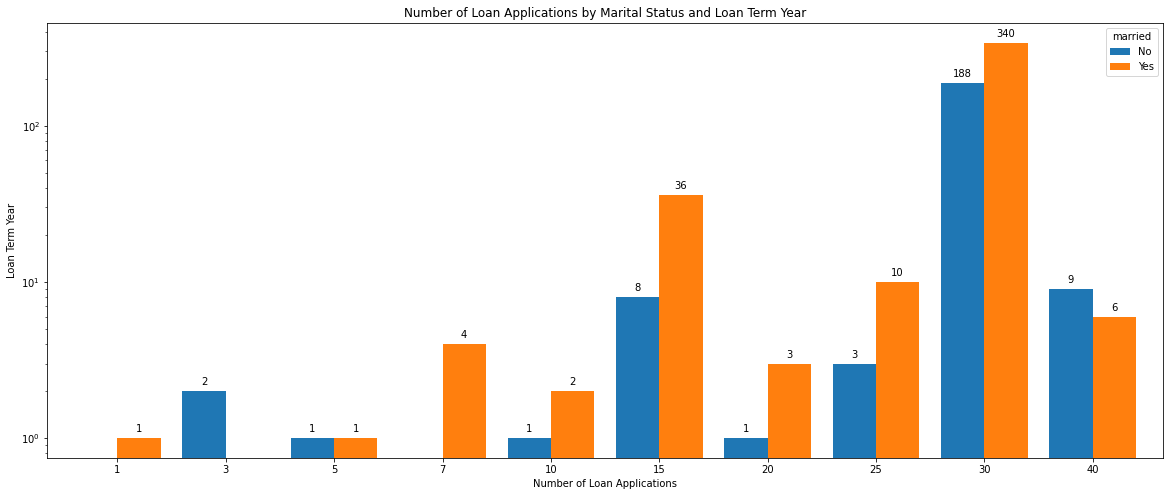

In [40]:
# Group the data by marital status, loan term year, and count the number of loan applications
loan_count_2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count()

# Convert the result into a pivot table
loan_count_2 = loan_count_2.reset_index().pivot(index='loan_term_year', columns='married', values='loan_id')

# Create a horizontal bar chart
ax = loan_count_2.plot(kind='bar', figsize=(20, 8), width=0.8)
plt.title('Number of Loan Applications by Marital Status and Loan Term Year')
plt.xlabel('Number of Loan Applications')
plt.ylabel('Loan Term Year')

# Show value counts on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=4)

plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

# Kesimpulan dan saran

## Kesimpulan

Ditemukan data sebagai berikut

1. Lebih banyak nasabah laki-laki yang mengajukan pinjaman untuk membeli properti dibanding perempuan, ada kemungkinan karena pada umumnya sebagai kepala keluarga. 

2. Perempuan lebih banyak memilih tipe properti apartemen.

3. Jumlah nasabah terbanyak yang mengajukan pinjaman, lebih banyak mengajukan pinjaman dengan jangka waktu 30 tahun, baik yang menikah ataupun belum menikah

4. Jumlah nasabah terbanyak yang mengajukan pinjaman, lebih banyak mengajukan pinjaman dengan jangka waktu 30 tahun, baik yang menikah ataupun belum menikah. 

5. peringkat ke 2 pengajuan pinjaman oleh orang yang telah menikah adalah 15 tahun.

6. peringkat ke 2 pengajuan pinjaman oleh orang yang belum menikah adalah 40 tahun.

7. nasabah yang telah berkeluarga lebih banyak melakukan pinjaman untuk properti.



## Saran

Dari informasi tersebut dapat disarankan untuk 


*   mempromosikan penawaran pinjaman bagi perempuan yang ingin membeli apartemen. 

*   mempromosikan untuk tawaran pinjaman untuk membeli properti dengan jangka waktu 30 tahun ataupun 15 tahun Kepada yang berkeluarga.

*   mempromosikan untuk tawaran pinjaman untuk membeli properti dengan jangka waktu 30 tahun Kepada yang belum berkeluarga.